In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Uppgift 1

In [2]:
def trapezoidal_integration(f, a, b, n):
    h = (b-a)/n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return x, y, h*(np.sum(y) - (y[0] + y[-1])/2)

In [3]:
def monte_carlo_integration(f, a, b, n):
    x = np.random.uniform(a, b, n)
    y = f(x)
    return x, y, (b-a)*np.mean(y) #volume 1d = b-a 

In [4]:
def f(x):
    return (x+1)**-(1/2)

In [5]:
def two_plots(x1,y1,e1,x2,y2,e2):
    plt.subplot(1, 2, 1)
    plt.plot(x1,y1)
    plt.axhline(y=e1, color='r', linestyle='-')
    plt.text(0.6,e1+0.01, 'I = ' + str(round(e1,5)), color='red')
    plt.xlabel('x')
    plt.title('Trapezoidal Integration')
    
    plt.subplot(1, 2, 2)
    plt.plot(x2,y2)
    plt.axhline(y=e2, color='r', linestyle='-')
    plt.text(0.6,e2+0.01, 'I = ' + str(round(e2,5)), color='red')
    plt.xlabel('x')
    plt.title('Monte Carlo Integration')

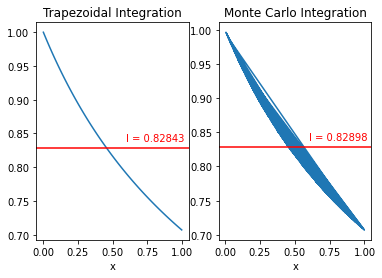

In [6]:
upper_bound = 1
lower_bound = 0
number_of_points = 100


a = trapezoidal_integration(f, lower_bound, upper_bound, number_of_points)
b = monte_carlo_integration(f, lower_bound, upper_bound, number_of_points)

two_plots(*(a+b))


# Uppgift 2

In [40]:

def S_i(T,std_dev,K,s,N):
    return s*np.exp(-(T/2)*std_dev**2 + std_dev*np.random.normal(0,std_dev,N))

def BS_zero_intr(T,std_dev,K,s,N):
    return np.sum(np.max(S_i(T,std_dev,K,s,N) - K,0))/N
   

In [44]:
T = 1
K = 1.22
std_dev = 0.2
s = K
#get max of each value in array
print(BS_zero_intr(T,std_dev,K,s,100000))

1.8860217406556589e-06


# Uppgift 3

In [9]:
def S_i(T,std_dev,s,N):
    S = np.zeros((len(s),N))
    for i in range(len(s)):
        S[i,:] = s[i]*np.exp(-std_dev**2*T/2 + std_dev*np.random.normal(0,T,N))
    return S

def vector_max(S):
    vec = np.zeros((1,1))
    for i in range(len(S[0])):
        np.append(vec,np.max(S[:,i]))
        #vec[i] = np.max(S[:,i])
    return vec

def BS_rainbow(T,std_dev,K,s_0,N):
    
    S_T = S_i(T,std_dev,s_0,N) #get matrix of S values
    
    S_T_max = vector_max(S_T) #get max of each column

    return np.sum(max(S_T_max - K,0))/N


In [10]:
T = 1
K = 1.22
std_dev = var = 0.2
s_0 = [1,1]
N = 1000

a = BS_rainbow(T,std_dev,K,s_0,N)

0.0
